In [3]:
import pandas as pd 
import numpy as np 


In [4]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)


In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
x_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [17]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

d:\python\envs\ai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4953 - loss: 0.7394 - val_accuracy: 0.7994 - val_loss: 0.5141
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8031 - loss: 0.4911 - val_accuracy: 0.8100 - val_loss: 0.4521
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8103 - loss: 0.4408 - val_accuracy: 0.8181 - val_loss: 0.4273
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.4182 - val_accuracy: 0.8325 - val_loss: 0.4125
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.4077 - val_accuracy: 0.8356 - val_loss: 0.3952
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8425 - loss: 0.3949 - val_accuracy: 0.8438 - val_loss: 0.3809
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8421 - loss: 0.3845 - val_accuracy: 0.8450 - val_loss: 0.3705
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3643 - val_accu

In [23]:
model.layers[0].get_weights()

[array([[-0.6323052 , -0.19546379, -0.14080034,  0.37058562, -0.1421748 ,
          0.08858258,  0.21309023,  0.14262015,  0.02639517,  0.01981883,
         -0.2160309 ],
        [-0.16830954, -0.09368109, -0.30707908, -0.14885968, -0.08771941,
          0.29554904,  0.35579482, -0.24464439, -0.9888972 , -0.23682706,
          0.23033293],
        [-0.8512443 , -0.13321774,  0.15661724,  0.01896399,  0.07123693,
          0.05919097, -0.12552188, -0.05064957, -0.03264667,  0.31377587,
         -0.00333781],
        [ 0.13219348, -0.34856078, -1.1859832 ,  0.13782124,  0.08121443,
         -0.04167406,  0.20930499, -0.24899535, -0.12460005, -0.6004111 ,
          0.6217679 ],
        [-0.40964416,  0.38973373, -0.23412152, -0.81657094,  1.2699668 ,
          0.31384483,  0.18942316,  1.0594883 ,  0.01469593,  0.13273379,
         -0.03832448],
        [ 0.44635904, -0.3287024 , -0.40111   , -0.03559563, -0.02570266,
          0.04116739,  0.33068132, -0.31937996, -0.06239012,  0.2884071

In [24]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
y_pred=np.where(y_log>0.5,1,0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.864

In [27]:
import matplotlib.pyplot as plt

In [28]:
history.history

{'accuracy': [0.6479687690734863,
  0.8010937571525574,
  0.8137500286102295,
  0.8215625286102295,
  0.8343750238418579,
  0.83984375,
  0.8442187309265137,
  0.8460937738418579,
  0.8503124713897705,
  0.8515625,
  0.8535937666893005,
  0.85546875,
  0.8557812571525574,
  0.8579687476158142,
  0.8576562404632568,
  0.8576562404632568,
  0.8603125214576721,
  0.8612499833106995,
  0.859375,
  0.8595312237739563,
  0.8614062666893005,
  0.8617187738418579,
  0.8612499833106995,
  0.8614062666893005,
  0.8621875047683716,
  0.862500011920929,
  0.8604687452316284,
  0.86328125,
  0.8628125190734863,
  0.862500011920929,
  0.8623437285423279,
  0.86328125,
  0.8637499809265137,
  0.8642187714576721,
  0.8654687404632568,
  0.8634374737739563,
  0.8637499809265137,
  0.864062488079071,
  0.8643749952316284,
  0.8648437261581421,
  0.8651562333106995,
  0.8634374737739563,
  0.8653125166893005,
  0.8648437261581421,
  0.8639062643051147,
  0.8654687404632568,
  0.8648437261581421,
  0.8650

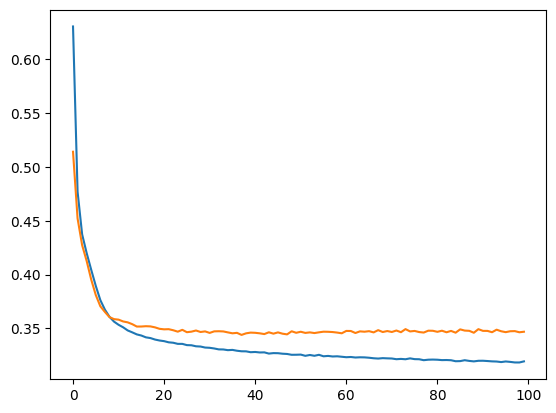

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

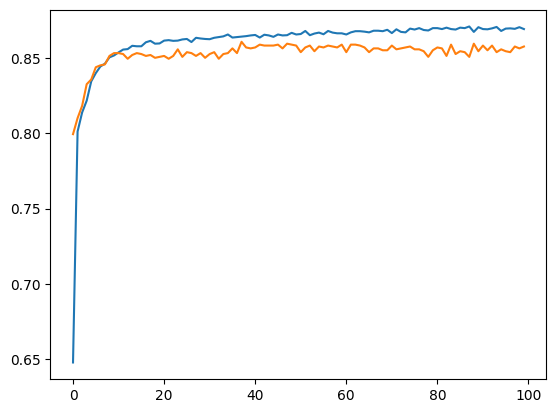

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
